<a href="https://colab.research.google.com/github/jainprashul/Machine-Learning/blob/master/Practical_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression Intro using Sklearn Models

In [0]:
!pip install quandl

[1076.50736425 1090.92514739 1104.91668412 1099.83151886 1093.44879717
 1090.76128109 1089.10746342 1086.11523711 1080.02950451 1075.66745335
 1073.2554543  1092.17543641 1110.62262339 1115.55724957 1130.25219374
 1134.35232559 1133.1971694  1130.51948805 1132.38430239 1150.24456163
 1150.0778159  1159.87382503 1156.58529535 1164.15646471 1184.08314503
 1196.77403741 1191.46715859 1203.10212116 1208.67325678 1206.76795282
 1197.50638873 1203.10965813 1201.55803422 1137.45262605 1084.96086009] 0.9792045122214929 35


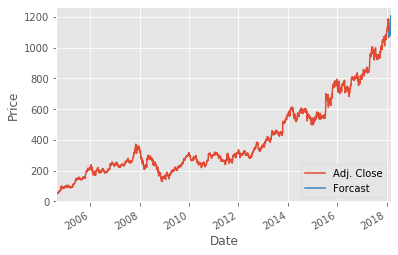

In [3]:
import pandas as pd
import quandl, math , datetime
import numpy as np
from sklearn import preprocessing , model_selection , svm
from sklearn.linear_model import LinearRegression

# Pickle to save Data
import pickle

# plot data
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')


# grab data
df = quandl.get('WIKI/GOOGL', api_key='Cksi_sp_6B-kgM5KbDuH')

df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

# added new cols in data
df['HL %'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.00
df['% Change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.00

#set data 
df = df[['Adj. Close','HL %','% Change' ,'Adj. Volume']]

#forcasting column
forcast_col = 'Adj. Close'

#fill blank data
df.fillna(-99999, inplace=True)  

# get 10% of data to predict
forcast_outputs = int(math.ceil(0.01 * len(df)))

# shift the predicted data shift to future data
df['label'] = df[forcast_col].shift(-forcast_outputs)
# print(df.tail())

# define features X & labels Y
X = np.array(df.drop(['label'], 1))


df.dropna(inplace=True)
y = np.array(df['label'])
X = preprocessing.scale(X)

# data with predictions
X = X[: -forcast_outputs]
# data on which prediction will happen
X_lately = X[-forcast_outputs:]  
df.dropna(inplace=True)

# print(len(X), len(y))

# create training & TESTING DATASET 
X_train , X_test , y_train , y_test = model_selection.train_test_split(X, y, test_size=0.2)

# set classifer
clf = LinearRegression()
# train classifer
clf.fit(X_train , y_train)

# save classifer model 
with open('linearReg.pickle', 'wb') as f:
    pickle.dump(clf , f)

# load classifer from file
loadfile = open('linearReg.pickle', 'rb')
clf = pickle.load(loadfile)


accuracy = clf.score(X_test , y_test)

# print(accuracy)
# predict data
forcast_set = clf.predict(X_lately)

print( forcast_set , accuracy ,forcast_outputs)

df['Forcast'] = np.nan

# ploting data 
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forcast_set :
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

df['Adj. Close'].plot()
df['Forcast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


Best Fit Slope & Line for Regression 

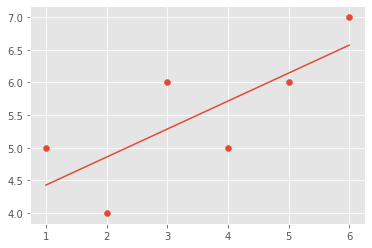

In [6]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt

# data points
xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype=np.float64)

def bestFitSlope_Intercept(x, y) : 
    m = ((mean(xs)* mean(ys)) - mean(xs*ys)) / (mean(xs)**2 - mean(xs**2))
    b = (mean(ys) - m*mean(xs))
    return m, b

m, b = bestFitSlope_Intercept(xs,ys)

# points for line
regression_line = [(m*x)+b for x in xs]


plt.scatter(xs , ys)
plt.plot(xs , regression_line)
plt.show()



Coefficent of Regression - R squared

In [0]:
def squared_error(ys_orig , ys_line) :
    return ((ys_line - ys_orig)**2)

def coefficent_of_determination()